In [6]:
import matplotlib.pyplot as plt
import time 
import numpy as np
from astropy.io import fits
import os
from numba import jit,prange
#directorio='/Users/oscar/Documents/Documentos/Docs/LME/CCD/OscuraImagenes15/'
directorio='/Users/oscar/Documents/Documentos/Docs/LME/CCD/Imagenes/OscuraImagenes/'
directorio_guardado='/Users/oscar/Documents/Documentos/Docs/LME/CCD/Imagenes/Demuxed/'
directorio_guardado_NOPROC='/Users/oscar/Documents/Documentos/Docs/LME/CCD/Imagenes/SinProcesar/'
contenido = os.listdir(directorio)

In [5]:
#Correccion aplicada
# Loop sobre todas las imagenes, se guarda en img_total cada ccd en fila demultiplexado
st = time.time()
#data=fits.HDUList([])
img_CCD16=fits.HDUList([]) #Se crearan nro_imagenes*nsamp/16 (Ej: 5*112/6=35)
#img_CCD16_NOPROC=fits.HDUList([])
for item in range(len(contenido)):
    hdulist = fits.open(directorio+contenido[item])
    tamx=int(hdulist[4].header['NAXIS1']) #134400
    tamy=int(hdulist[4].header['NAXIS2']) #Varia 
    nsamp=int(hdulist[4].header['NSAMP']) #112
    ncol=int(hdulist[4].header['NCOL'])
    ccdncol=int(hdulist[4].header['CCDNCOL'])
    scidata = hdulist[4].data
    tamxpimg=int(tamx/nsamp)
    div=16 #Variable multiplo de 2^n 
    #img_parcial= np.zeros((tamy,tamxpimg),'i4')       #Se crean las imagenes parciales 
    
    for j in range(int(nsamp/16)):                        #Se recorre nsamp/16=7 veces por cada imagen 
        for i in range(div):                               #Se recorre 16 veces para ir agarrando 16 CCD 
            img_parcial= np.zeros((tamy,tamxpimg),'i4') #SI NO SE CREA ACA HACE PROBLEMAS (?
            for k in range(tamxpimg):              #Se recorre tamx/nsamp=1200 veces para agarrar un CCD
                img_parcial[:,k]=scidata[:,(k*nsamp)+(i+div*j)]
            #img_CCD16_NOPROC.append(fits.ImageHDU(img_parcial)) 
            for p in range(tamy):
                #print("Se sacara el offset de las columnas ",tamxpimg*(i+1)-int(ncol-ccdncol/2),"hasta la ", tamxpimg*(i+1), "en la fila ",p)
                offset=np.mean(img_parcial[p,(tamxpimg-int(ncol-ccdncol/2)):tamxpimg])
                #print("el offset es",offset)
                img_parcial[p,:]=img_parcial[p,:]-offset
            img_CCD16.append(fits.ImageHDU(img_parcial)) 
        #Proceso de guardado
        nombre=str(directorio_guardado+"MCM"+str(j+1)+"_Demuxed_"+contenido[item]+"_PROC.fits")
        hdul=fits.HDUList(img_CCD16)    
        img_CCD16.writeto(nombre,overwrite=True)
        
        #nombre_NOPROC=str(directorio_guardado_NOPROC+"MCM"+str(j+1)+"_Demuxed_"+contenido[item]+".fits")
        #hdul2=fits.HDUList(img_CCD16_NOPROC)    
        #img_CCD16_NOPROC.writeto(nombre_NOPROC,overwrite=True)
        #print('Se termino la imagen ',item,"demux ",j)
        img_CCD16.clear()
        #img_CCD16_NOPROC.clear()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 16.354997873306274 seconds


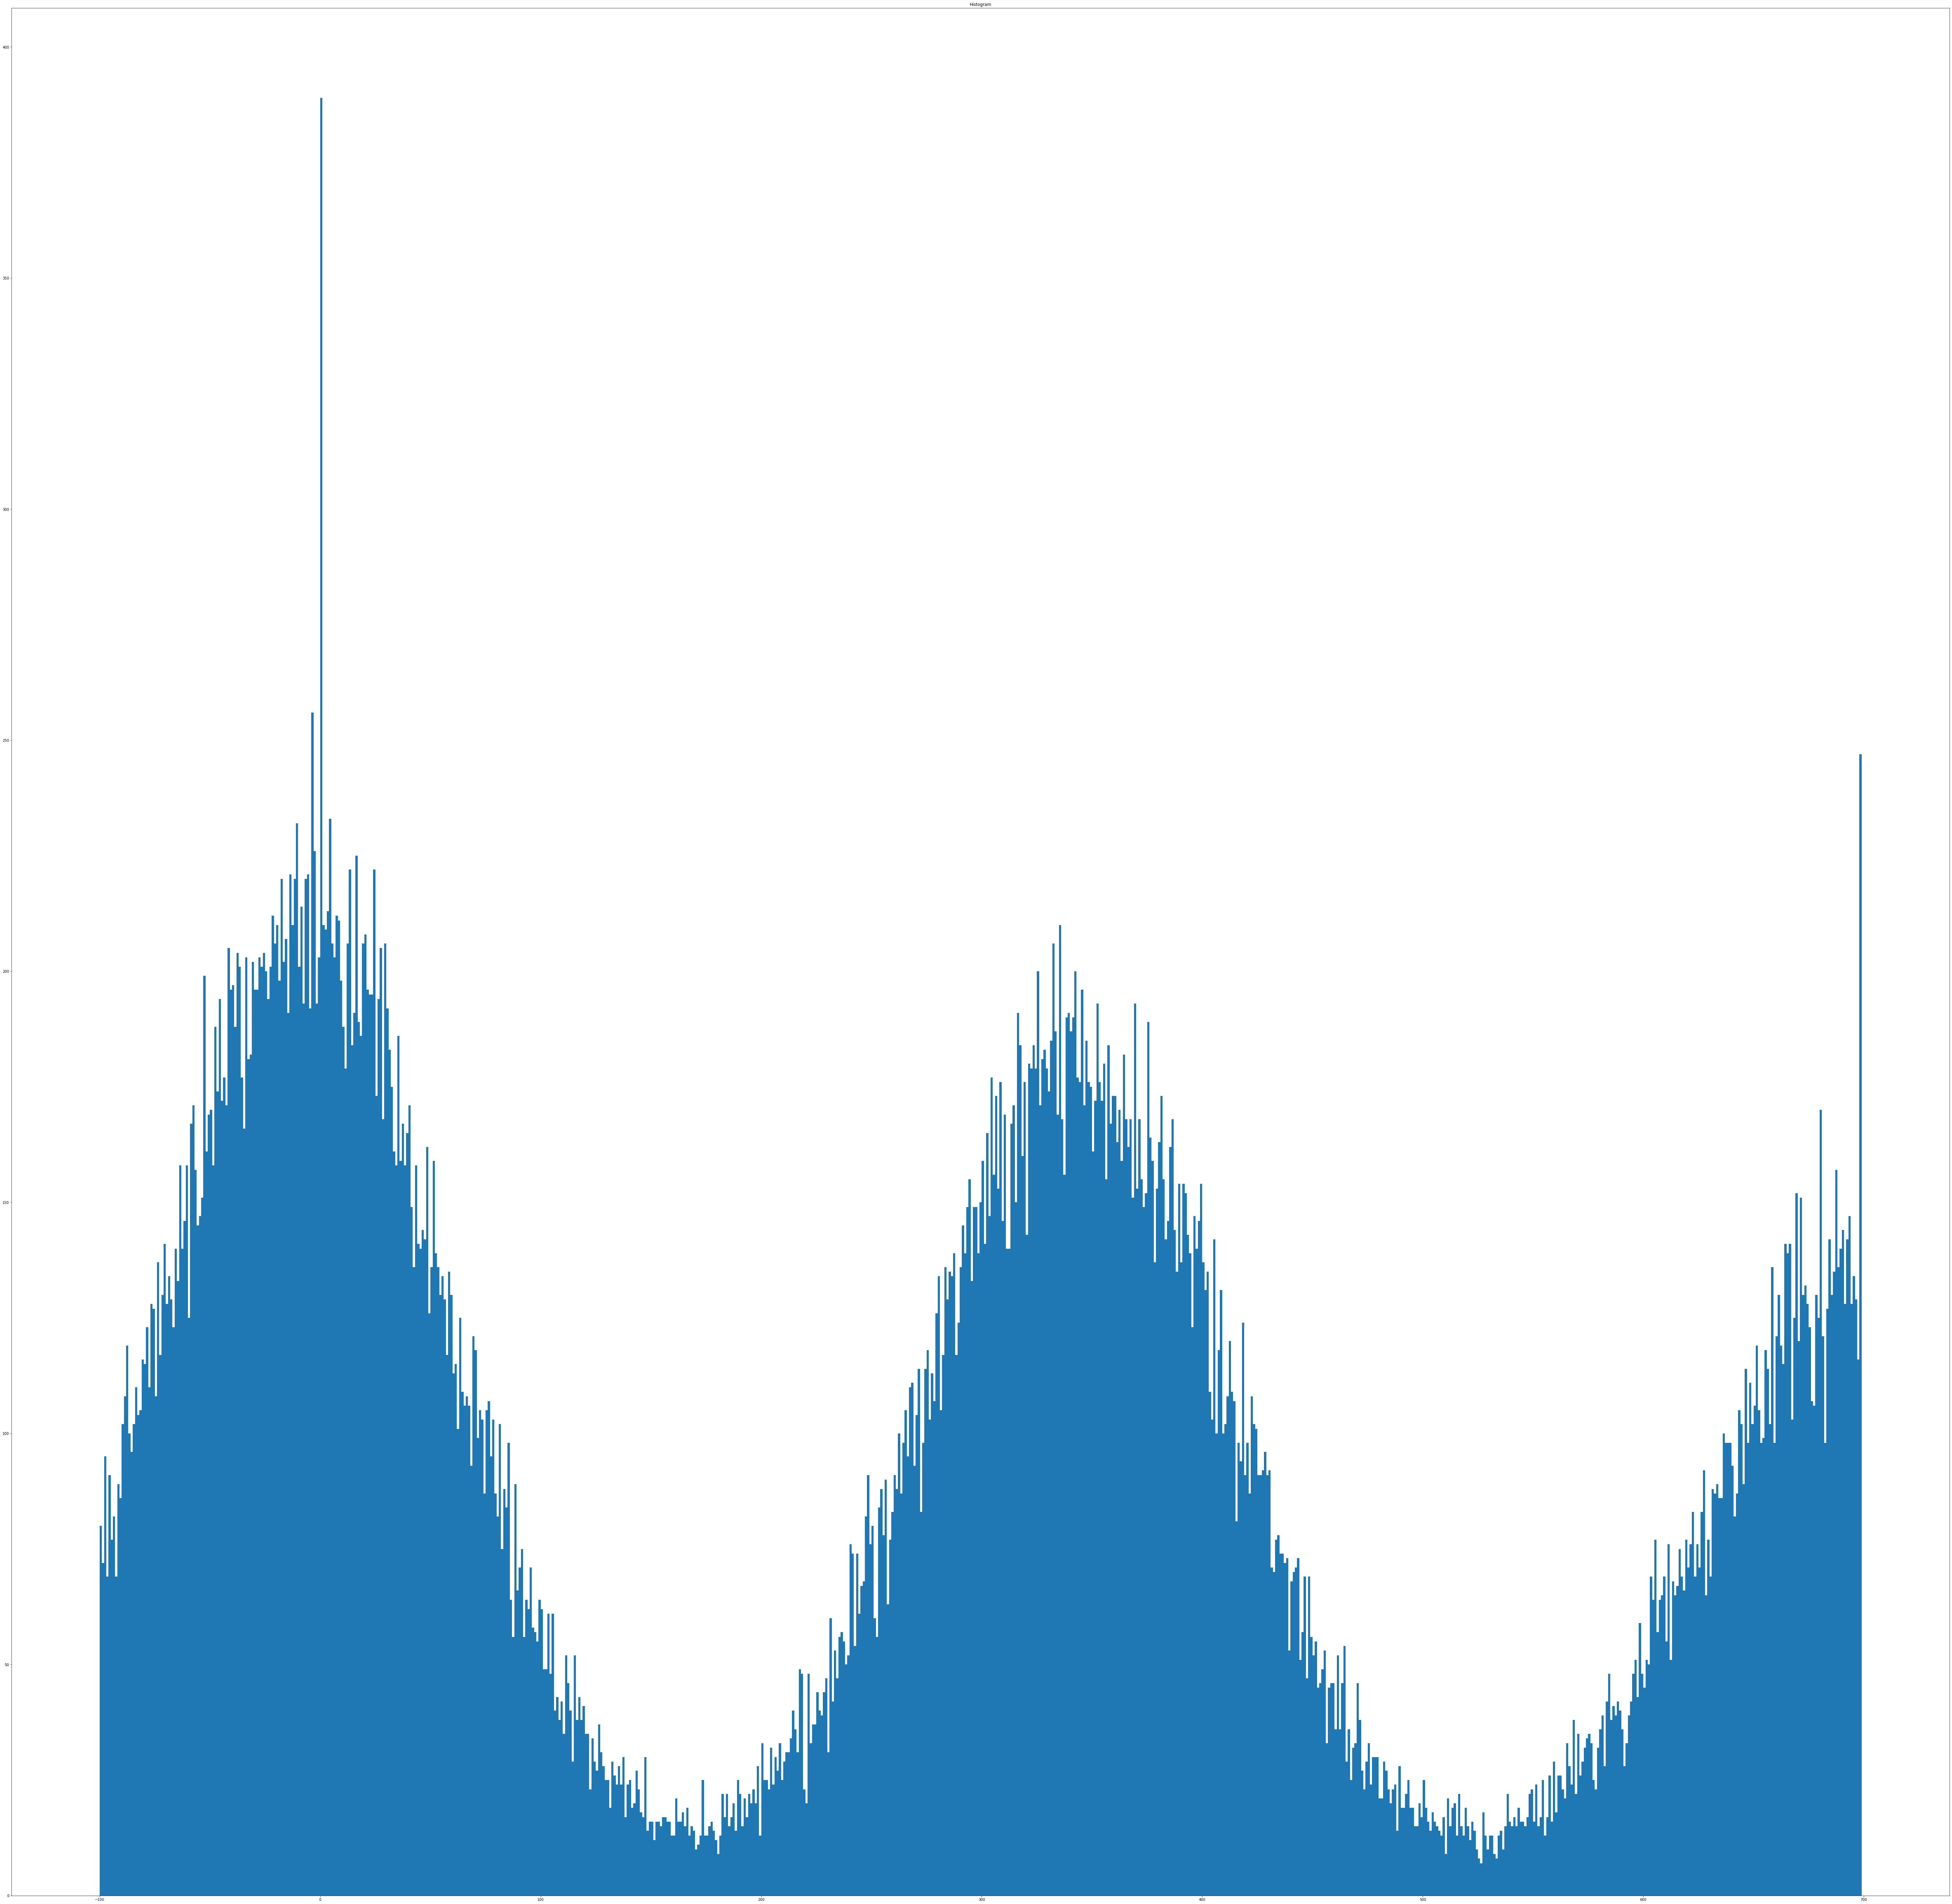

In [8]:
#Creacion del histograma
#Determinacion de la imagen a la imagen a ser analizada
contenido_guardado = os.listdir(directorio_guardado)
hdulist_guardado = fits.open(directorio_guardado+"MCM2_Demuxed_ANSAMP400_VoltsV2_11.fz_PROC.fits") #contenido_guardado[35]
scidata_guardado = hdulist_guardado[4].data
#Histograma
a=list(range(-100,700)) #Rango en X
fig = plt.figure(figsize =(100,100))
plt.hist(scidata_guardado.flatten(),bins=a)
plt.title("Histogram")
plt.show()